In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()

#from scipy.stats import norm
#from sklearn import preprocessing



In [2]:
df    = pd.read_csv("reto_data/measurements.csv", decimal=",")

In [3]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [5]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
df.duplicated().sum()

0

# Variables CATEGORICAS:

In [7]:
print(f"Variables categoricas encontradas: {list(df.columns[df.dtypes == 'object'])}")
df[[ c for c in df.columns if df[c].dtype == "object" ]].describe().T

Variables categoricas encontradas: ['specials', 'gas_type', 'refill gas']


,count,unique,top,freq
specials,93,12,rain,32
gas_type,388,2,SP98,228
refill gas,13,2,SP98,8


In [8]:
df.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [9]:
df.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [10]:
df["refill gas"].value_counts()

SP98    8
E10     5
Name: refill gas, dtype: int64

# Variables NUMÉRICAS:

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill liters,13.0,37.115385,8.587282,10.0,37.60,38.0,39.0,45.0


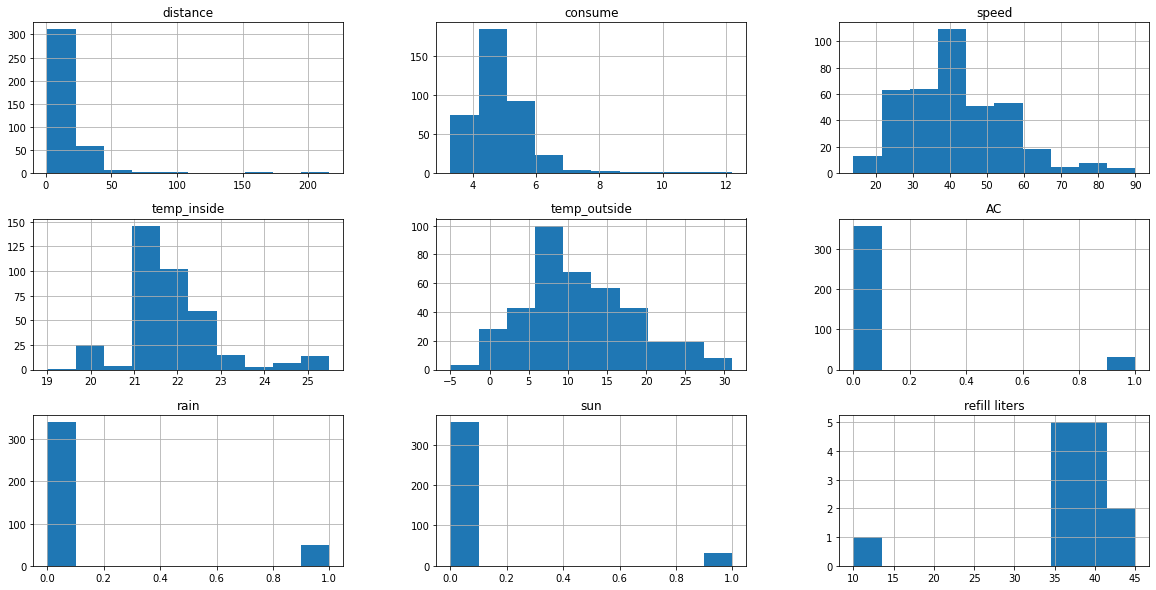

In [12]:
df.hist(figsize=(20,10));

Las variables AC, rain y sun son datos booleanos.
Observando los datos manualmente, entendemos que los dias que no son lluviosos, son soleados.
Corregimos el dataset para que ponga 1 en "Sun" cuando no sean lluviosos.

In [13]:
df["rain"].sum()

48

In [14]:
df["sun"].sum()

32

In [15]:
df["sun"] = 1 - df["rain"]
df["sun"].sum()

340

In [16]:
df["rain"].sum()

48

## Chequeo de litros consumidos:

In [17]:
df["distance"].sum()

7625.299999999999

In [18]:
df["refill liters"].sum()

482.5

In [19]:
df["refill gas"].value_counts()

SP98    8
E10     5
Name: refill gas, dtype: int64

In [20]:
df[df["refill gas"] == "SP98"]["refill liters"].sum()

284.5

In [21]:
df[df["refill gas"] == "E10"]["refill liters"].sum()

198.0

Se observan un total de trece repostajes con un total de 482,5 litros: 

    - 8 repostajes de combustible SP98 con un total de 284,5 litros
    
    - 5 repostajes de combustible E10  con un total de 198   litros


Suponemos que el consumo es en litros/100 kilómetros.
Multiplicamos la distancia recorrida en cada trayecto por la media de consumo y tenemos el consumo en cada trayecto.

In [22]:
df["liters_consumed"] = df["distance"]*df["consume"]/100
df["liters_consumed"].sum()


362.8942

In [23]:
print(f"El consumo medio según los litros repostado y los kilómetros realizados es {(df['refill liters'].sum()/df['distance'].sum()*100).round(1)} litros/100 km.")
print(f"El consumo total según consumo * distancia registrados es                  {(df['liters_consumed'].sum()/df['distance'].sum()*100).round(1)} litros/100 km.")

El consumo medio según los litros repostado y los kilómetros realizados es 6.3 litros/100 km.
El consumo total según consumo * distancia registrados es                  4.8 litros/100 km.


Hay una diferencia del 30% entre los litros totales repostados y el consumo indicado en cada trayecto.
O bien el dataset no tiene todos los trayectos entre repostaje y repostaje o bien el dato de consumo registrado está trucado.
como no sabemos la realidad con los datos, damos por hecho que los datos están bien y pasamos a analizar tendencias dependiendo del combustible. Podemos olvidarnos de las columnas de repostaje.

Antes de ello analizamos si este mismo fenómeno se repite igualmente independientemente del combustible:

In [25]:
df_SP98 = df[df["gas_type"] == "SP98"]
print("Para el combustible SP98:")
print(f"Se han realizado un total de {df_SP98['distance'].sum()} kilómetros.")
print(f"Se han repostado un total de {df_SP98['refill liters'].sum()} litros de SP98.")
print(f"El consumo medio según los litros repostado y los kilómetros realizados es {(df_SP98['refill liters'].sum()/df_SP98['distance'].sum()*100).round(1)} litros/100 km.")
print(f"El consumo total según consumo * distancia registrados es                  {(df_SP98['liters_consumed'].sum()/df_SP98['distance'].sum()*100).round(1)} litros/100 km.")
print(f"La diferencia es de un {(100 * (df_SP98['refill liters'].sum()/df_SP98['distance'].sum()*100) / (df_SP98['liters_consumed'].sum()/df_SP98['distance'].sum()*100) - 100 ).round(1)} %")
print("\n")
df_E10  = df[df["gas_type"] == "E10"]
print("Para el combustible E10:")
print(f"Se han realizado un total de {df_E10['distance'].sum()} kilómetros.")
print(f"Se han repostado un total de {df_E10['refill liters'].sum()} litros de E10.")
print(f"El consumo medio según los litros repostado y los kilómetros realizados es {(df_E10['refill liters'].sum()/df_E10['distance'].sum()*100).round(1)} litros/100 km.")
print(f"El consumo total según consumo * distancia registrados es                  {(df_E10['liters_consumed'].sum()/df_E10['distance'].sum()*100).round(1)} litros/100 km.")
print(f"La diferencia es de un {(100 * (df_E10['refill liters'].sum()/df_E10['distance'].sum()*100) / (df_E10['liters_consumed'].sum()/df_E10['distance'].sum()*100) - 100 ).round(1)} %")


Para el combustible SP98:
Se han realizado un total de 4249.9 kilómetros.
Se han repostado un total de 284.5 litros de SP98.
El consumo medio según los litros repostado y los kilómetros realizados es 6.7 litros/100 km.
El consumo total según consumo * distancia registrados es                  4.7 litros/100 km.
La diferencia es de un 41.2 %


Para el combustible E10:
Se han realizado un total de 3375.4 kilómetros.
Se han repostado un total de 198.0 litros de E10.
El consumo medio según los litros repostado y los kilómetros realizados es 5.9 litros/100 km.
El consumo total según consumo * distancia registrados es                  4.8 litros/100 km.
La diferencia es de un 22.7 %


Se observa que con el combustible SP98, el error de medida del consumo se duplica.

# Analizamos colinearidad entre los datos:

Text(0.5, 1.0, 'PEARSON CORRELATION MATRIX')

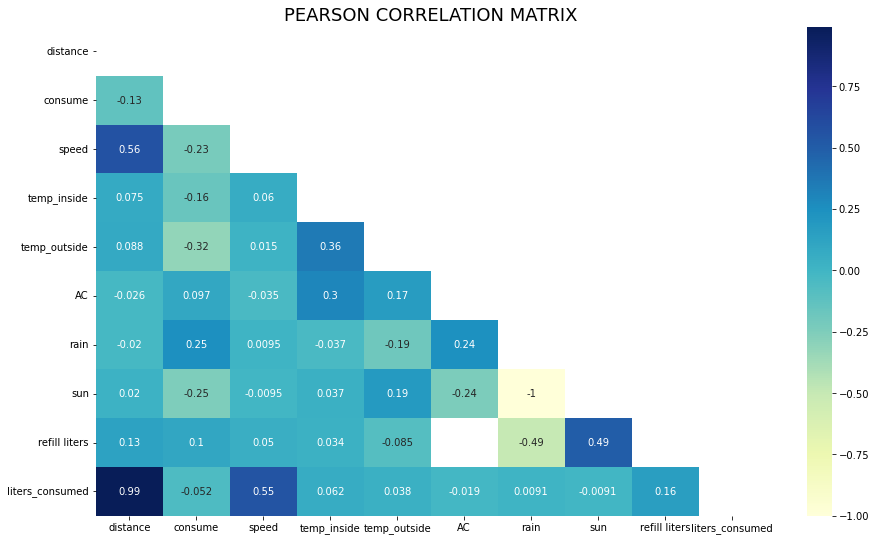

In [26]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, mask=mask , annot=True, ax=ax, cmap="YlGnBu")
plt.title('PEARSON CORRELATION MATRIX', fontsize=18)

No observamos ninguna colinearidad relevante para la variable consumo, aún así vamos a representarlo graficamente:

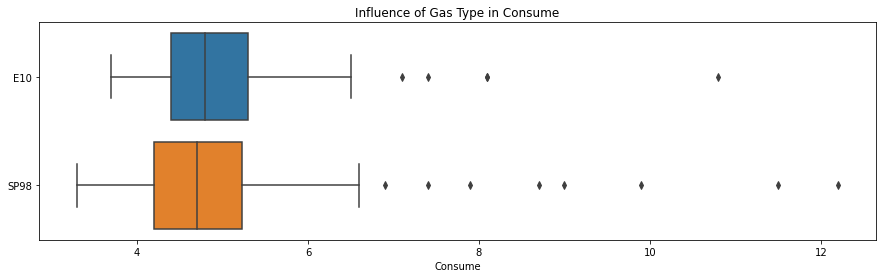

In [27]:
fig,ax = plt.subplots(figsize=(15,4))
plt.title("Influence of Gas Type in Consume")

sns.boxplot(x=df.consume, y=df.gas_type )
plt.xlabel("Consume")
plt.ylabel("")
plt.show()

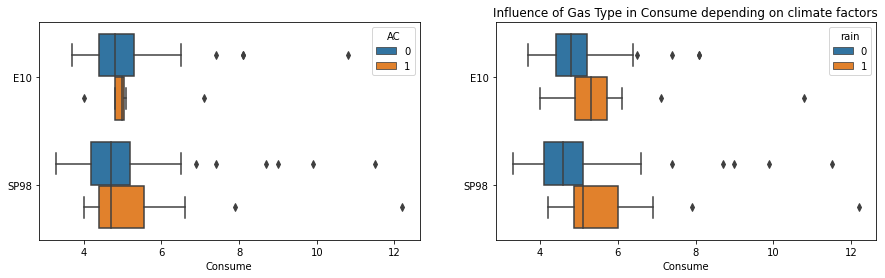

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
plt.title("Influence of Gas Type in Consume depending on climate factors")

ax[0] = plt.subplot(1, 2, 1)
sns.boxplot(x=df.consume, y=df.gas_type , hue = df.AC )
plt.xlabel("Consume")
plt.ylabel("")

ax[1] = plt.subplot(1, 2, 2)
sns.boxplot(x=df.consume, y=df.gas_type , hue = df.rain)
plt.xlabel("Consume")
plt.ylabel("")

plt.show()

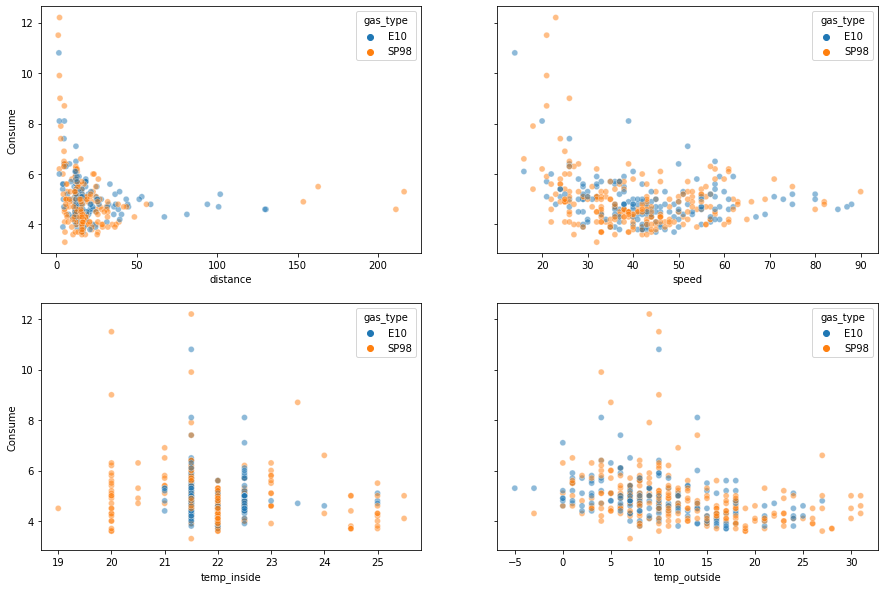

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(15,10), sharey=True)

alpha = .5

ax[0,0] = plt.subplot(2, 2, 1)
sns.scatterplot(x="distance", y="consume", hue="gas_type", data=df , alpha=alpha)
plt.xlabel('distance')
plt.ylabel('Consume')

ax[0,1] = plt.subplot(2, 2, 2)
sns.scatterplot(x="speed", y="consume", hue="gas_type", data=df , alpha=alpha)
plt.xlabel('speed')
plt.ylabel('Consume')

ax[1,0] = plt.subplot(2, 2, 3)
sns.scatterplot(x="temp_inside", y="consume", hue="gas_type", data=df , alpha=alpha)
plt.xlabel('temp_inside')
plt.ylabel('Consume')

ax[1,1] = plt.subplot(2, 2, 4)
sns.scatterplot(x="temp_outside", y="consume", hue="gas_type", data=df , alpha=alpha)
plt.xlabel('temp_outside')
plt.ylabel('Consume')

plt.show()

Text(0, 0.5, 'Consume')

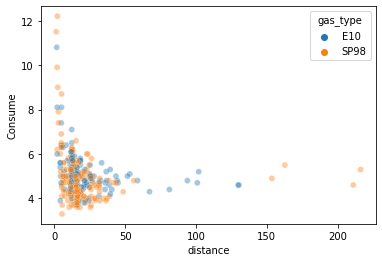

In [30]:
sns.scatterplot(x="distance", y="consume", hue="gas_type" , data=df , alpha=0.4)
plt.xlabel('distance')
plt.ylabel('Consume')